In [102]:
import numpy as np 
import cv2 
import os 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 

from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

from keras.layers import Flatten
from keras.layers import Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical 
from sklearn.metrics import classification_report, confusion_matrix  
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16 
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.regularizers import l2 
from tensorflow.keras.models import load_model, save_model

In [103]:
images_path = './images2'

In [104]:
X = [] 
y = [] 
width = [] 
height = []

In [105]:
for subfolder in os.listdir(images_path):
        subfolder_path = os.path.join(images_path, subfolder)
        if os.path.isdir(subfolder_path):
            for filename in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, filename)
                try:
                    img = cv2.imread(img_path)
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                    X.append(img)
                    y.append(subfolder)  
                    width.append(img.shape[1]) 
                    height.append(img.shape[0])   
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")

In [106]:
print(f'number of images : {len(y)}')

number of images : 355


Text(0.5, 1.0, 'MehranGhafoorian')

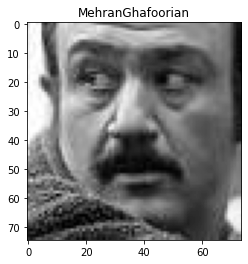

In [107]:
plt.imshow(X[147], cmap='gray') 
plt.title(y[147])

In [108]:
pd.DataFrame({'height':height,'width':width}).describe()

,height,width
count,355.000000,355.000000
mean,210.822535,210.715493
std,134.246967,134.145741
min,36.000000,36.000000
25%,107.000000,108.000000
50%,186.000000,186.000000
75%,268.000000,268.000000
max,958.000000,958.000000


In [109]:
for i, image in enumerate(X):
    X[i] = cv2.resize(image, (100, 100)).astype(float) / 255

Text(0.5, 1.0, 'MohamadEsfehani')

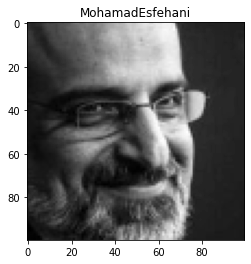

In [110]:
plt.imshow(X[180], cmap='gray') 
plt.title(y[180])

In [111]:
X = np.array(X)
y = np.array(y)

In [112]:
name_counts = np.unique(y, return_counts=True) 
name_counts_dict = dict(zip(name_counts[0], name_counts[1]))
names, counts = zip(*name_counts_dict.items()) 

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(y)
# num_classes = len(np.unique(encoded_labels))

In [113]:
names = list(names)
names

['AliDaei',
 'AlirezaBeiranvand',
 'BaharehKianAfshar',
 'BahramRadan',
 'HomayoonShajarian',
 'JavadRazavian',
 'MehranGhafoorian',
 'MohamadEsfehani',
 'MohsenChavoshi',
 'NazaninBayati',
 'RezaAttaran',
 'SaharDolatshahi',
 'SeyedJalalHosseini',
 'SogolKhaligh',
 'TaranehAlidoosti']

<AxesSubplot:>

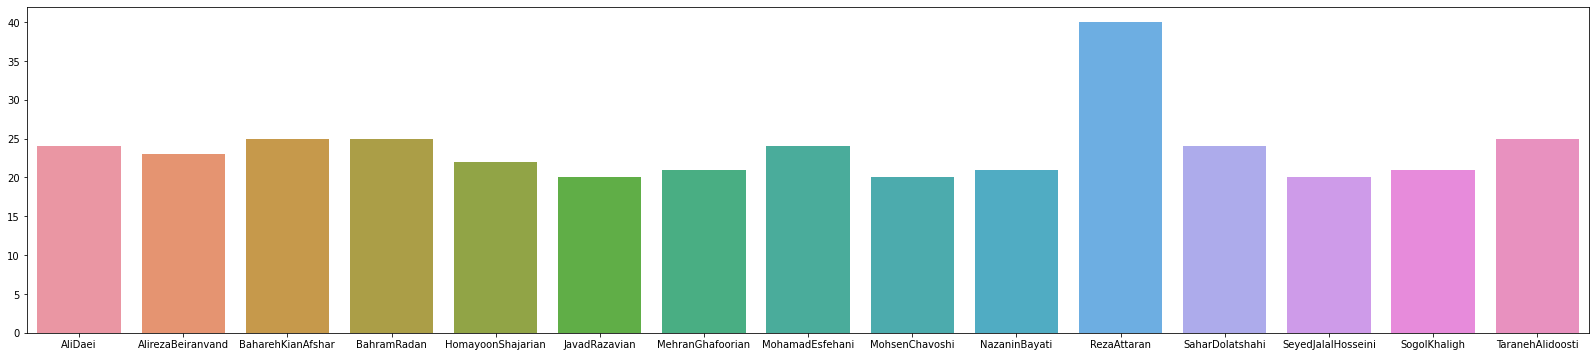

In [114]:
plt.figure(figsize=(28,6))
sns.barplot(x=list(names), y=list(counts))

In [115]:
X_train, X_temp, y_train, y_temp = train_test_split(X, encoded_labels, test_size=0.25, stratify=encoded_labels, random_state=42) 
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.4, stratify=y_temp, random_state=42)

In [116]:
cnn_model_v1 = Sequential()

cnn_model_v1.add(Conv2D(128, (3, 3), activation='relu', input_shape=(100, 100, 1))) 
cnn_model_v1.add(MaxPooling2D((2, 2))) 


cnn_model_v1.add(Conv2D(64, (3, 3), activation='relu')) 
cnn_model_v1.add(MaxPooling2D((2, 2)))   


cnn_model_v1.add(Conv2D(32, (3, 3), activation='relu')) 
cnn_model_v1.add(MaxPooling2D((2, 2)))  


cnn_model_v1.add(Flatten()) 
 
cnn_model_v1.add(Dense(256, activation='relu')) 

cnn_model_v1.add(Dense(15, activation='softmax'))

In [117]:
cnn_model_v1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 98, 98, 128)       1280      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 49, 49, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 47, 47, 64)        73792     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 23, 23, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 21, 21, 32)        18464     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 10, 10, 32)       

In [118]:
cnn_model_v1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [119]:
info = cnn_model_v1.fit(X_train,y_train,epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
9/9 [==============================] - 6s 423ms/step - loss: 2.7243 - accuracy: 0.0564 - val_loss: 2.7030 - val_accuracy: 0.1111
Epoch 2/10
9/9 [==============================] - 3s 366ms/step - loss: 2.7014 - accuracy: 0.1128 - val_loss: 2.6956 - val_accuracy: 0.1111
Epoch 3/10
9/9 [==============================] - 3s 337ms/step - loss: 2.6827 - accuracy: 0.1278 - val_loss: 2.6708 - val_accuracy: 0.1111
Epoch 4/10
9/9 [==============================] - 3s 326ms/step - loss: 2.6527 - accuracy: 0.1128 - val_loss: 2.6434 - val_accuracy: 0.1389
Epoch 5/10
9/9 [==============================] - 3s 322ms/step - loss: 2.5020 - accuracy: 0.1767 - val_loss: 2.4046 - val_accuracy: 0.1667
Epoch 6/10
9/9 [==============================] - 3s 326ms/step - loss: 2.1392 - accuracy: 0.2932 - val_loss: 2.2967 - val_accuracy: 0.2778
Epoch 7/10
9/9 [==============================] - 3s 325ms/step - loss: 1.8115 - accuracy: 0.4211 - val_loss: 2.3920 - val_accuracy: 0.2500
Epoch 8/10
9/9 [====

In [120]:
prob_pred = cnn_model_v1.predict(X_test)

2/2 [==============================] - 0s 71ms/step


In [121]:
pred = prob_pred.argmax(axis=1) 

In [122]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         3
           2       0.50      0.50      0.50         4
           3       0.29      0.50      0.36         4
           4       1.00      0.50      0.67         4
           5       0.40      0.67      0.50         3
           6       0.20      0.33      0.25         3
           7       1.00      0.33      0.50         3
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         3
          10       0.50      0.50      0.50         6
          11       0.00      0.00      0.00         4
          12       0.50      0.33      0.40         3
          13       0.00      0.00      0.00         3
          14       0.17      0.33      0.22         3

    accuracy                           0.28        53
   macro avg       0.30      0.27      0.26        53
weighted avg       0.32   

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


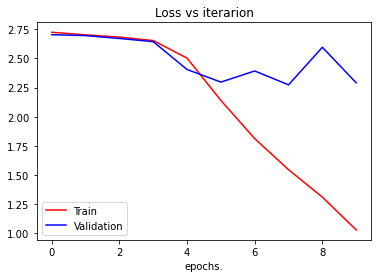

In [123]:
plt.plot(info.history['loss'], color='red', label='Train')  
plt.plot(info.history['val_loss'], color='blue', label='Validation') 
plt.title('Loss vs iterarion') 
plt.xlabel('epochs.') 
plt.legend()

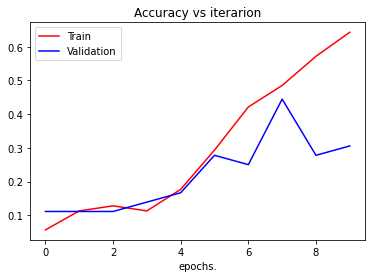

In [124]:
plt.plot(info.history['accuracy'], color='red', label='Train')  
plt.plot(info.history['val_accuracy'], color='blue', label='Validation') 
plt.title('Accuracy vs iterarion') 
plt.xlabel('epochs.') 
plt.legend()

Text(0.5, 1.0, 'Confusion Matrix')

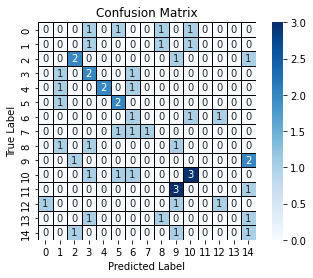

In [125]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap="Blues", square=True,
            xticklabels=np.arange(15), yticklabels=np.arange(15), linewidths=0.5, linecolor='black')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

In [126]:
cnn_model_v2 = Sequential() 
cnn_model_v2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1))) 
cnn_model_v2.add(MaxPooling2D((2, 2))) 

cnn_model_v2.add(Conv2D(32, (3, 3), activation='relu')) 
cnn_model_v2.add(MaxPooling2D((2, 2)))   

cnn_model_v2.add(Flatten()) 
 
cnn_model_v2.add(Dense(32, activation='relu')) 

cnn_model_v2.add(Dense(15, activation='softmax'))

In [127]:
cnn_model_v2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 49, 49, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 23, 23, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_6 (Flatten)         (None, 16928)             0         
                                                                 
 dense_12 (Dense)            (None, 32)               

In [128]:
cnn_model_v2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [129]:
info = cnn_model_v2.fit(X_train,y_train,epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
9/9 [==============================] - 2s 103ms/step - loss: 2.7230 - accuracy: 0.1053 - val_loss: 2.7012 - val_accuracy: 0.1111
Epoch 2/10
9/9 [==============================] - 1s 69ms/step - loss: 2.6957 - accuracy: 0.1165 - val_loss: 2.7012 - val_accuracy: 0.1111
Epoch 3/10
9/9 [==============================] - 1s 72ms/step - loss: 2.6808 - accuracy: 0.1353 - val_loss: 2.6872 - val_accuracy: 0.1667
Epoch 4/10
9/9 [==============================] - 1s 72ms/step - loss: 2.6369 - accuracy: 0.1203 - val_loss: 2.6598 - val_accuracy: 0.1667
Epoch 5/10
9/9 [==============================] - 1s 83ms/step - loss: 2.5428 - accuracy: 0.1805 - val_loss: 2.6174 - val_accuracy: 0.1667
Epoch 6/10
9/9 [==============================] - 1s 84ms/step - loss: 2.3880 - accuracy: 0.2030 - val_loss: 2.6662 - val_accuracy: 0.1389
Epoch 7/10
9/9 [==============================] - 1s 88ms/step - loss: 2.2216 - accuracy: 0.2707 - val_loss: 2.5501 - val_accuracy: 0.1944
Epoch 8/10
9/9 [==========

In [130]:
prob_pred = cnn_model_v2.predict(X_test)
pred = prob_pred.argmax(axis=1) 
print(classification_report(y_test, pred))

2/2 [==============================] - 0s 19ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         4
           3       0.50      0.50      0.50         4
           4       0.50      0.25      0.33         4
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         3
           7       0.12      0.33      0.18         3
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         3
          10       0.21      1.00      0.35         6
          11       0.25      0.25      0.25         4
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         3
          14       0.33      0.33      0.33         3

    accuracy                           0.23        53
   macro avg       0.13     

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


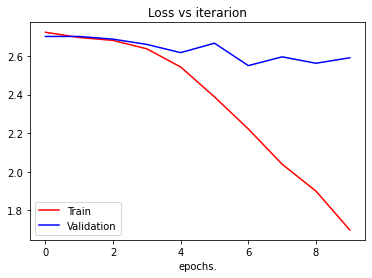

In [131]:
plt.plot(info.history['loss'], color='red', label='Train')  
plt.plot(info.history['val_loss'], color='blue', label='Validation') 
plt.title('Loss vs iterarion') 
plt.xlabel('epochs.') 
plt.legend()

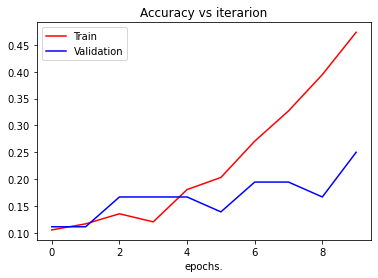

In [132]:
plt.plot(info.history['accuracy'], color='red', label='Train')  
plt.plot(info.history['val_accuracy'], color='blue', label='Validation') 
plt.title('Accuracy vs iterarion') 
plt.xlabel('epochs.') 
plt.legend()

Text(0.5, 1.0, 'Confusion Matrix')

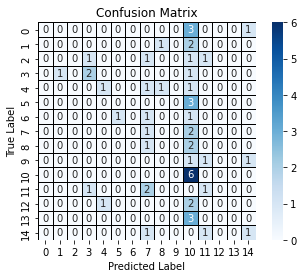

In [133]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap="Blues", square=True,
            xticklabels=np.arange(15), yticklabels=np.arange(15), linewidths=0.5, linecolor='black')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

In [134]:
cnn_model_v3 = Sequential() 
cnn_model_v3.add(Conv2D(128, (5, 5), activation='relu', input_shape=(100, 100, 1))) 
cnn_model_v3.add(MaxPooling2D((2, 2))) 
cnn_model_v3.add(BatchNormalization())

cnn_model_v3.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.00005))) 
cnn_model_v3.add(MaxPooling2D((2, 2)))   
cnn_model_v3.add(BatchNormalization())


cnn_model_v3.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.00005))) 
cnn_model_v3.add(MaxPooling2D((2, 2)))  
cnn_model_v3.add(BatchNormalization())

cnn_model_v3.add(Flatten()) 
 
cnn_model_v3.add(Dense(256, activation='relu')) 
cnn_model_v3.add(Dropout(0.5))  

cnn_model_v3.add(Dense(15, activation='softmax'))

In [135]:
cnn_model_v3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 96, 96, 128)       3328      
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 48, 48, 128)       0         
 ng2D)                                                           
                                                                 
 batch_normalization_8 (Bat  (None, 48, 48, 128)       512       
 chNormalization)                                                
                                                                 
 conv2d_19 (Conv2D)          (None, 46, 46, 64)        73792     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 23, 23, 64)        0         
 ng2D)                                                           
                                                      

In [136]:
optimizer = Adam(learning_rate=0.001)    
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)
cnn_model_v3.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [137]:
info = cnn_model_v3.fit(X_train,y_train,epochs=100, validation_data=(X_val, y_val), verbose=2,
                       callbacks=[reduce_lr])

Epoch 1/100
9/9 - 6s - loss: 3.5341 - accuracy: 0.1053 - val_loss: 2.7236 - val_accuracy: 0.0833 - lr: 0.0010 - 6s/epoch - 673ms/step
Epoch 2/100
9/9 - 4s - loss: 2.2619 - accuracy: 0.3308 - val_loss: 2.7746 - val_accuracy: 0.0833 - lr: 0.0010 - 4s/epoch - 398ms/step
Epoch 3/100
9/9 - 4s - loss: 1.2965 - accuracy: 0.6015 - val_loss: 2.8345 - val_accuracy: 0.0833 - lr: 0.0010 - 4s/epoch - 403ms/step
Epoch 4/100
9/9 - 4s - loss: 0.8685 - accuracy: 0.6992 - val_loss: 2.9071 - val_accuracy: 0.0833 - lr: 0.0010 - 4s/epoch - 395ms/step
Epoch 5/100
9/9 - 3s - loss: 0.6518 - accuracy: 0.8045 - val_loss: 3.0261 - val_accuracy: 0.1111 - lr: 0.0010 - 3s/epoch - 363ms/step
Epoch 6/100
9/9 - 3s - loss: 0.3916 - accuracy: 0.9023 - val_loss: 3.0798 - val_accuracy: 0.1389 - lr: 0.0010 - 3s/epoch - 339ms/step
Epoch 7/100
9/9 - 3s - loss: 0.2715 - accuracy: 0.9286 - val_loss: 3.1918 - val_accuracy: 0.1111 - lr: 3.1623e-04 - 3s/epoch - 339ms/step
Epoch 8/100
9/9 - 3s - loss: 0.2356 - accuracy: 0.9398 - v

Epoch 61/100
9/9 - 3s - loss: 0.0714 - accuracy: 1.0000 - val_loss: 2.5658 - val_accuracy: 0.3333 - lr: 3.1623e-09 - 3s/epoch - 372ms/step
Epoch 62/100
9/9 - 3s - loss: 0.0919 - accuracy: 0.9887 - val_loss: 2.5072 - val_accuracy: 0.3611 - lr: 3.1623e-09 - 3s/epoch - 384ms/step
Epoch 63/100
9/9 - 3s - loss: 0.0786 - accuracy: 0.9850 - val_loss: 2.4546 - val_accuracy: 0.3611 - lr: 3.1623e-09 - 3s/epoch - 377ms/step
Epoch 64/100
9/9 - 3s - loss: 0.0996 - accuracy: 0.9887 - val_loss: 2.4050 - val_accuracy: 0.3889 - lr: 3.1623e-09 - 3s/epoch - 346ms/step
Epoch 65/100
9/9 - 3s - loss: 0.0856 - accuracy: 0.9850 - val_loss: 2.3577 - val_accuracy: 0.3889 - lr: 3.1623e-09 - 3s/epoch - 341ms/step
Epoch 66/100
9/9 - 3s - loss: 0.0903 - accuracy: 0.9925 - val_loss: 2.3141 - val_accuracy: 0.4167 - lr: 3.1623e-09 - 3s/epoch - 343ms/step
Epoch 67/100
9/9 - 3s - loss: 0.0879 - accuracy: 0.9850 - val_loss: 2.2761 - val_accuracy: 0.4167 - lr: 3.1623e-09 - 3s/epoch - 338ms/step
Epoch 68/100
9/9 - 3s - los

In [138]:
prob_pred = cnn_model_v3.predict(X_test)

2/2 [==============================] - 0s 72ms/step


In [139]:
pred = prob_pred.argmax(axis=1) 

In [140]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.25      0.25      0.25         4
           1       0.00      0.00      0.00         3
           2       0.25      0.25      0.25         4
           3       1.00      0.75      0.86         4
           4       0.50      0.25      0.33         4
           5       0.50      0.33      0.40         3
           6       0.40      0.67      0.50         3
           7       0.60      1.00      0.75         3
           8       0.67      0.67      0.67         3
           9       0.00      0.00      0.00         3
          10       0.62      0.83      0.71         6
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00         3
          13       0.50      0.33      0.40         3
          14       0.20      0.33      0.25         3

    accuracy                           0.40        53
   macro avg       0.37      0.38      0.36        53
weighted avg       0.38   

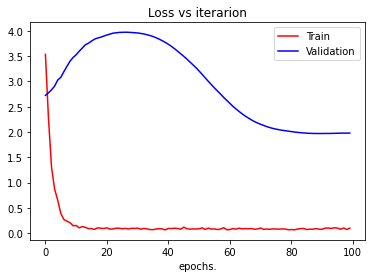

In [141]:
plt.plot(info.history['loss'], color='red', label='Train')  
plt.plot(info.history['val_loss'], color='blue', label='Validation') 
plt.title('Loss vs iterarion') 
plt.xlabel('epochs.') 
plt.legend()

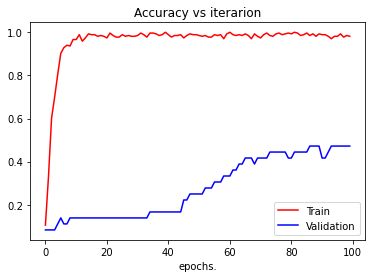

In [142]:
plt.plot(info.history['accuracy'], color='red', label='Train')  
plt.plot(info.history['val_accuracy'], color='blue', label='Validation') 
plt.title('Accuracy vs iterarion') 
plt.xlabel('epochs.') 
plt.legend()

Text(0.5, 1.0, 'Confusion Matrix')

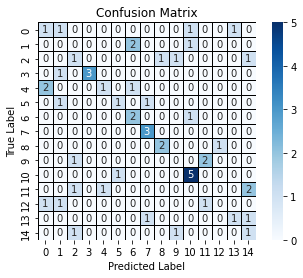

In [143]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap="Blues", square=True,
            xticklabels=np.arange(15), yticklabels=np.arange(15), linewidths=0.5, linecolor='black')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

In [144]:
augmenter = ImageDataGenerator(
    rotation_range=30,  
    horizontal_flip=True,
    vertical_flip=True, 
    shear_range=0.2, 
    zoom_range=0.2
) 

In [145]:
X = X.reshape(X.shape[0], 100, 100, 1)
X_augmented = []
y_augmented = []

for i in range(X.shape[0]):
    original_image = X[i]
    original_label = encoded_labels[i]

    original_image = original_image.reshape(1, 100, 100, 1)
    augmented_images = []

    for _ in range(2):  
        augmented_image = next(augmenter.flow(original_image, batch_size=1))[0]
        augmented_images.append(augmented_image)

    X_augmented.extend([original_image[0]] + augmented_images)
    y_augmented.extend([original_label] * 3)

In [146]:
X_augmented = np.array(X_augmented) 
y_augmented = np.array(y_augmented)

array(['MehranGhafoorian'], dtype='<U18')

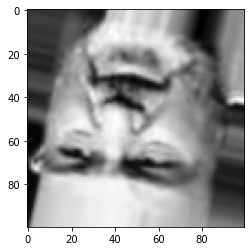

In [147]:
plt.imshow(X_augmented[421], cmap='gray') 
label_encoder.inverse_transform([y_augmented[421]])

In [148]:
X_train_augmented, X_temp, y_train_augmented, y_temp = train_test_split(X_augmented, y_augmented, test_size=0.25, stratify=y_augmented, random_state=42)
X_test_augmented, X_val_augmented, y_test_augmented, y_val_augmented = train_test_split(X_temp, y_temp, test_size=0.4, stratify=y_temp, random_state=42)

In [174]:
cnn_model_v4 = Sequential() 
cnn_model_v4.add(Conv2D(128, (5, 5), activation='relu', input_shape=(100, 100, 1))) 
cnn_model_v4.add(MaxPooling2D((2, 2))) 
cnn_model_v4.add(BatchNormalization())

cnn_model_v4.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.00005))) 
cnn_model_v4.add(MaxPooling2D((2, 2)))   
cnn_model_v4.add(BatchNormalization())


cnn_model_v4.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.00005))) 
cnn_model_v4.add(MaxPooling2D((2, 2)))  
cnn_model_v4.add(BatchNormalization())

cnn_model_v4.add(Flatten()) 
 
cnn_model_v4.add(Dense(64, activation='relu')) 
cnn_model_v4.add(Dropout(0.5))  

cnn_model_v4.add(Dense(15, activation='softmax'))

In [175]:
optimizer = Adam(learning_rate=0.001)    
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)
cnn_model_v4.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
info = cnn_model_v4.fit(X_augmented,y_augmented,epochs=20, validation_data=(X_val_augmented, y_val_augmented), verbose=2,
                       callbacks=[reduce_lr])

Epoch 1/20
34/34 - 21s - loss: 3.1567 - accuracy: 0.1408 - val_loss: 2.7183 - val_accuracy: 0.0841 - lr: 0.0010 - 21s/epoch - 624ms/step
Epoch 2/20
34/34 - 15s - loss: 2.4001 - accuracy: 0.2657 - val_loss: 2.7102 - val_accuracy: 0.0748 - lr: 0.0010 - 15s/epoch - 434ms/step
Epoch 3/20
34/34 - 14s - loss: 2.1112 - accuracy: 0.2977 - val_loss: 3.0004 - val_accuracy: 0.1308 - lr: 0.0010 - 14s/epoch - 420ms/step
Epoch 4/20
34/34 - 14s - loss: 1.7218 - accuracy: 0.4169 - val_loss: 3.4210 - val_accuracy: 0.0935 - lr: 0.0010 - 14s/epoch - 412ms/step
Epoch 5/20
34/34 - 14s - loss: 1.5709 - accuracy: 0.4761 - val_loss: 3.5503 - val_accuracy: 0.0748 - lr: 0.0010 - 14s/epoch - 412ms/step
Epoch 6/20
34/34 - 14s - loss: 1.3713 - accuracy: 0.5493 - val_loss: 3.6359 - val_accuracy: 0.1028 - lr: 0.0010 - 14s/epoch - 406ms/step
Epoch 7/20
34/34 - 14s - loss: 1.2055 - accuracy: 0.5962 - val_loss: 4.3146 - val_accuracy: 0.1215 - lr: 0.0010 - 14s/epoch - 402ms/step
Epoch 8/20
34/34 - 14s - loss: 0.9678 - a

In [152]:
prob_pred = cnn_model_v4.predict(X_test_augmented)

5/5 [==============================] - 1s 122ms/step


In [153]:
pred = prob_pred.argmax(axis=1) 

In [154]:
print(classification_report(y_test_augmented, pred))

              precision    recall  f1-score   support

           0       0.41      0.82      0.55        11
           1       1.00      0.60      0.75        10
           2       0.58      0.64      0.61        11
           3       0.70      0.64      0.67        11
           4       1.00      0.40      0.57        10
           5       1.00      0.44      0.62         9
           6       1.00      0.60      0.75        10
           7       0.82      0.82      0.82        11
           8       0.50      0.22      0.31         9
           9       1.00      0.22      0.36         9
          10       0.42      1.00      0.59        18
          11       0.60      0.55      0.57        11
          12       0.70      0.78      0.74         9
          13       0.75      0.30      0.43        10
          14       0.50      0.55      0.52        11

    accuracy                           0.60       160
   macro avg       0.73      0.57      0.59       160
weighted avg       0.71   

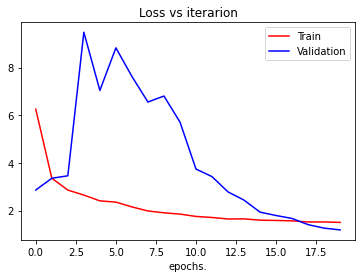

In [155]:
plt.plot(info.history['loss'], color='red', label='Train')  
plt.plot(info.history['val_loss'], color='blue', label='Validation') 
plt.title('Loss vs iterarion') 
plt.xlabel('epochs.') 
plt.legend()

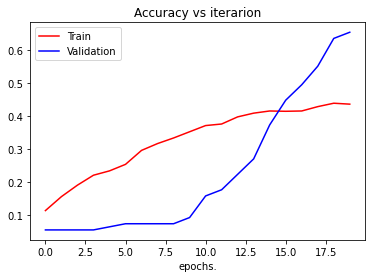

In [156]:
plt.plot(info.history['accuracy'], color='red', label='Train')  
plt.plot(info.history['val_accuracy'], color='blue', label='Validation') 
plt.title('Accuracy vs iterarion') 
plt.xlabel('epochs.') 
plt.legend()

Text(0.5, 1.0, 'Confusion Matrix')

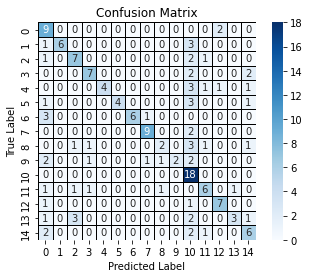

In [157]:
sns.heatmap(confusion_matrix(y_test_augmented, pred), annot=True, cmap="Blues", square=True,
            xticklabels=np.arange(15), yticklabels=np.arange(15), linewidths=0.5, linecolor='black')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

In [158]:
def predict_celeb(image): 
    image = cv2.resize(image, (100, 100)) 
    return label_encoder.inverse_transform(cnn_model_v1.predict(image).argmax(axis=1))

In [159]:
cnn_model_v4.save('./model/final_cnn.h5')

C:\Users\HP\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [169]:
image = cv2.imread('./unnamed.jpg')

In [163]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [167]:
image = cv2.resize(image, (100, 100, 1))

error: OpenCV(4.8.1) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - Can't parse 'dsize'. Expected sequence length 2, got 3
>  - Can't parse 'dsize'. Expected sequence length 2, got 3


In [166]:
image.shape

(185, 145)

In [160]:
loaded_model = load_model('./model/final_cnn.h5')

In [161]:
names 

['AliDaei',
 'AlirezaBeiranvand',
 'BaharehKianAfshar',
 'BahramRadan',
 'HomayoonShajarian',
 'JavadRazavian',
 'MehranGhafoorian',
 'MohamadEsfehani',
 'MohsenChavoshi',
 'NazaninBayati',
 'RezaAttaran',
 'SaharDolatshahi',
 'SeyedJalalHosseini',
 'SogolKhaligh',
 'TaranehAlidoosti']

In [170]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
image = cv2.resize(image, (100, 100))
result = cnn_model_v4.predict(image.reshape(1, 100, 100))

1/1 [==============================] - 0s 365ms/step


In [172]:
result.argmax(axis=1)

array([3], dtype=int64)

In [173]:
names[3]

'BahramRadan'